<a href="https://colab.research.google.com/github/JozefV99/Master-Thesis/blob/main/synthetic_dataset_generation/COMPOSITE_BACKGROUND_GENERATION_(LOCAL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COMPOSITE BACKGROUND GENERATION:**

There have been collected 3 sets of pictures with 100 pictures in each set. These pictures were borrowed from a free high-resolution image library https://unsplash.com/. The Unplash library allows to download, copy, modify, distribute, and use the photos for free, including commercial purposes. Each composite background contains all 100 pictures from one of the sets and has a resolution of 3800x3800p. Pictures in this notebook have been resized due to limited capacity available. Image generation process uses the original resolution. Since there are 3 different codes and 3 different picture sets, the final number of unique backgrounds used for image generation is 9.

## **PICTURE SETS (EXAMPLES):**

The first set contains multicolored pictures of buldings and other architectular designs. The second set contains multicolor patterns of various shapes and contrasts. The third and final set contains pictures of wood and concrete that are prevalently brownish/grayish in color. These three sets collectively aim to cover a wide range of color diversity, thus closely replicating the colors found in real-world photographs.

### **1.**

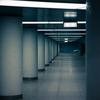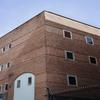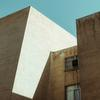

### **2.**

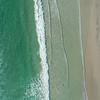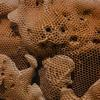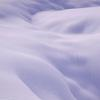

### **3.**

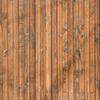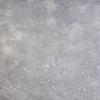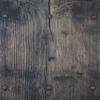

## **BACKGROUND TYPE 1:**

The following python code uses PIL library to make a composite image from 100 individual images. It resizes each image using a uniform size of 100x100p. Consequently, a transparent canvas of size 4000x4000p is put in place. This script utilizes an overlay function in combination with smooth mask creation to create smoother and more fluent connections between pictures. Overlay function computes how many times each picture should be overlayed based on the number of pictures (length of a list) multiplied by 200. Smooth mask provides a smooth transition between individual pictures and tries to blend them together. Individual pictures are randomly selected and rotated. Finally, the composite image is trimmed by 100p from each side to get rid of any white spots and create a solid border.

In [ ]:
from PIL import Image, ImageDraw
import os
import random

# Directory where images are stored
image_dir = "C:\\Master's Thesis\\Data\\Background pictures"
# Get a list of all image files in the specified directory
image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(('png', 'jpg', 'jpeg'))]

# Raise an error if no images are found in the directory
if not image_files:
    raise ValueError("No images found in the specified directory.")

# Preload images into a list
preload_images = []
target_size = (100, 100)  # Define the target size for resizing the images
for image_file in image_files:
    img = Image.open(image_file).convert("RGBA")  # Open the image and convert to RGBA for transparency support
    img = img.resize(target_size, Image.Resampling.LANCZOS)  # Resize the image using Lanczos resampling
    preload_images.append(img)  # Add the resized image to the preload list

# Define the size of the composite canvas
canvas_size = (4000, 4000)
# Create a new transparent canvas image
composite_image = Image.new('RGBA', canvas_size, (0, 0, 0, 0))

# Define the number of overlay times based on the number of preloaded images
overlay_times = 200 * len(preload_images)

def create_smooth_mask(size, edge=30):
    """Create a mask with a smoother transition from opacity to transparency."""
    mask = Image.new('L', size, 255)  # Start with a fully opaque mask
    draw = ImageDraw.Draw(mask)

    # Create a gradient effect by reducing the opacity at the edges
    for i in range(edge):
        alpha = int(255 * (1 - (i / edge)))  # Calculate the alpha value for the gradient
        draw.rectangle([i, i, size[0]-i-1, size[1]-i-1], outline=0, width=1)  # Draw the gradient outline
        draw.rectangle([i, i, size[0]-i-1, size[1]-i-1], outline=alpha)  # Apply the calculated alpha value

    return mask  # Return the created mask

# Loop to overlay the preloaded images onto the composite canvas
for _ in range(overlay_times):
    img = random.choice(preload_images)  # Randomly choose an image from the preloaded images
    img = img.rotate(random.randint(0, 360), fillcolor=(0,0,0,0))  # Rotate the image randomly with a transparent fill color

    # Calculate random position to paste the image on the canvas
    max_x = max(composite_image.width - img.width, 1)
    max_y = max(composite_image.height - img.height, 1)
    position = (random.randint(0, max_x), random.randint(0, max_y))

    # Create a smooth mask for the image
    mask = create_smooth_mask(img.size, edge=20)
    # Paste the image onto the canvas using the smooth mask
    composite_image.paste(img, position, mask)

# Define the border width to be trimmed from the final composite image
border_width = 100
# Crop the final image to remove the border
final_image = composite_image.crop((border_width, border_width, composite_image.width - border_width, composite_image.height - border_width))

# Define the path where the final composite image will be saved
composite_image_path = "D:\\COMPOSIT\\composite_image13.png"
# Save the final trimmed composite image to the specified path
final_image.save(composite_image_path)
print(f"Final trimmed composite image saved to {composite_image_path}")

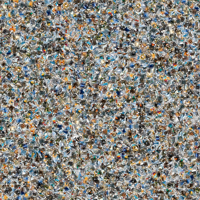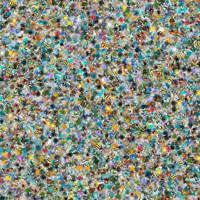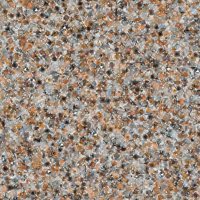

## **BACKGROUND TYPE 2:**

This script allows for bigger images by increasing target size from 100x100p to 150x150p. The canvas used at the beginning has been converted from transparent to white, creating a lighter appearance. In addition, the masking function has been changed by further reducing opacity effect and increasing mask edge, which makes the connections between individual pictures slightly softer.

In [ ]:
from PIL import Image, ImageDraw, ImageFilter
import os
import random

# Directory where images are stored
image_dir = "C:\\Users\\juros\\OneDrive - SIEMENSGAMESA\\Master's Thesis\\Data\\Background pictures"
# Get a list of all image files in the specified directory
image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(('png', 'jpg', 'jpeg'))]

# Raise an error if no images are found in the directory
if not image_files:
    raise ValueError("No images found in the specified directory.")

# Preload images into a list
preload_images = []
target_size = (150, 150)  # Increased from 100x100 to 150x150 for bigger images
for image_file in image_files:
    img = Image.open(image_file).convert("RGBA")  # Open the image and convert to RGBA for transparency support
    img = img.resize(target_size, Image.Resampling.LANCZOS)  # Resize the image using Lanczos resampling
    preload_images.append(img)  # Add the resized image to the preload list

# Define the size of the composite canvas
canvas_size = (4000, 4000)
# Create a new canvas image with a white background for a lighter appearance
composite_image = Image.new('RGBA', canvas_size, (255, 255, 255, 255))

# Define the number of overlay times based on the number of preloaded images
overlay_times = 200 * len(preload_images)

def create_smooth_mask(size, edge=50):
    """Create a mask with a smoother transition from opacity to transparency."""
    mask = Image.new('L', size, 0)  # Start with a fully transparent mask
    draw = ImageDraw.Draw(mask)

    # Reduce opacity even further for an ultra-soft look
    for i in range(edge):
        alpha = int(45 * (1 - (i / edge)))  # Opacity reduced to 45 from 60
        draw.rectangle([i, i, size[0]-i-1, size[1]-i-1], outline=alpha, fill=alpha)
    return mask  # Return the created mask

# Loop to overlay the preloaded images onto the composite canvas
for _ in range(overlay_times):
    img = random.choice(preload_images)  # Randomly choose an image from the preloaded images
    img = img.rotate(random.randint(0, 360), fillcolor=(0,0,0,0))  # Rotate the image randomly with a transparent fill color

    # Calculate random position to paste the image on the canvas
    max_x = max(composite_image.width - img.width, 1)
    max_y = max(composite_image.height - img.height, 1)
    position = (random.randint(0, max_x), random.randint(0, max_y))

    # Create a smooth mask for the image
    mask = create_smooth_mask(img.size, edge=50)  # Using an even lighter mask
    # Paste the image onto the canvas using the smooth mask
    composite_image.paste(img, position, mask)

# Apply a gentle blur to the entire image to unify the appearance
composite_image = composite_image.filter(ImageFilter.GaussianBlur(radius=0))  # Apply a blur to soften edges further

# Define the border width to be trimmed from the final composite image
border_width = 100
# Crop the final image to remove the border
final_image = composite_image.crop((border_width, border_width, composite_image.width - border_width, composite_image.height - border_width))

# Define the path where the final composite image will be saved
composite_image_path = "D:\\COMPOSIT\\composite_image14.png"
# Save the final trimmed composite image to the specified path
final_image.save(composite_image_path)
print(f"Final trimmed composite image saved to {composite_image_path}")

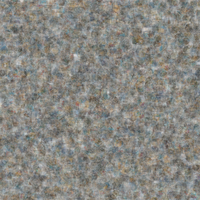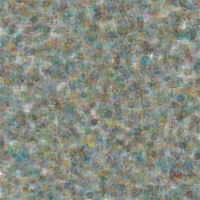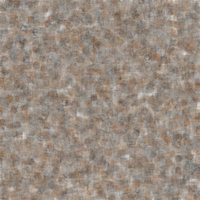

## **BACKGROUND TYPE 3:**

The final script is very similar to the first script in its functionality. The main difference is that this script additionaly applies a Gausssian Blur filter with a radius of 3. This effect blends little details, making the final composite image look blurred. The rest of the functionalities are the same or almost identical to the first script.

In [ ]:
from PIL import Image, ImageDraw, ImageFilter
import os
import random

# Directory where images are stored
image_dir = "C:\\Master's Thesis\\Data\\Background pictures"
# Get a list of all image files in the specified directory
image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(('png', 'jpg', 'jpeg'))]

# Raise an error if no images are found in the directory
if not image_files:
    raise ValueError("No images found in the specified directory.")

# Preload images into a list
preload_images = []
target_size = (100, 100)  # Define the target size for resizing the images
for image_file in image_files:
    img = Image.open(image_file).convert("RGBA")  # Open the image and convert to RGBA for transparency support
    img = img.resize(target_size, Image.Resampling.LANCZOS)  # Resize the image using Lanczos resampling
    preload_images.append(img)  # Add the resized image to the preload list

# Define the size of the composite canvas
canvas_size = (4000, 4000)
# Create a new transparent canvas image
composite_image = Image.new('RGBA', canvas_size, (0, 0, 0, 0))

# Define the number of overlay times based on the number of preloaded images
overlay_times = 200 * len(preload_images)

def create_smooth_mask(size, edge=30):
    """Create a mask with a smoother transition from opacity to transparency."""
    mask = Image.new('L', size, 255)  # Start with a fully opaque mask
    draw = ImageDraw.Draw(mask)

    # Create a gradient effect by reducing the opacity at the edges
    for i in range(edge):
        alpha = int(255 * (1 - (i / edge)))  # Calculate the alpha value for the gradient
        draw.rectangle([i, i, size[0]-i-1, size[1]-i-1], outline=0, width=1)  # Draw the gradient outline
        draw.rectangle([i, i, size[0]-i-1, size[1]-i-1], outline=alpha)  # Apply the calculated alpha value

    return mask  # Return the created mask

# Loop to overlay the preloaded images onto the composite canvas
for _ in range(overlay_times):
    img = random.choice(preload_images)  # Randomly choose an image from the preloaded images
    img = img.rotate(random.randint(0, 360), fillcolor=(0,0,0,0))  # Rotate the image randomly with a transparent fill color

    # Calculate random position to paste the image on the canvas
    max_x = max(composite_image.width - img.width, 1)
    max_y = max(composite_image.height - img.height, 1)
    position = (random.randint(0, max_x), random.randint(0, max_y))

    # Create a smooth mask for the image
    mask = create_smooth_mask(img.size, edge=20)
    # Paste the image onto the canvas using the smooth mask
    composite_image.paste(img, position, mask)

# Define the border width to be trimmed from the final composite image
border_width = 100
# Crop the final image to remove the border
final_image = composite_image.crop((border_width, border_width, composite_image.width - border_width, composite_image.height - border_width))

# Apply Gaussian Blur to the final composite image
blur_radius = 3
final_blurred_image = final_image.filter(ImageFilter.GaussianBlur(blur_radius))  # Apply the blur to the cropped image

# Define the path where the final composite image will be saved
composite_image_path = "D:\\COMPOSIT\\composite_image15.png"
# Save the final blurred composite image to the specified path
final_blurred_image.save(composite_image_path)
print(f"Final blurred composite image saved to {composite_image_path}")

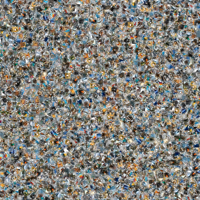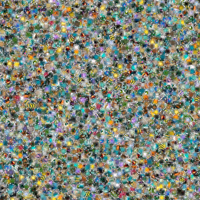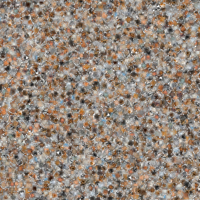